In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import skimage.io as io
import numpy as np

In [2]:
WHITE = 255
BLACK = 0

In [3]:
def apply_global_median_threshold(im):
    im = im[:, :, 0]
    median_threshold = np.median(im.flatten())
    return 255 * (im >= median_threshold)

In [30]:

def neighbours(x, y, img):
    return [ img[x-1][y], img[x-1][y+1], img[x][y+1], img[x+1][y+1],     # P2,P3,P4,P5
                img[x+1][y], img[x+1][y-1], img[x][y-1], img[x-1][y-1] ]    # P6,P7,P8,P9

def transitions(neighbours):
    n = neighbours + neighbours[0]      # P2, P3, ..., P9, P2
    return sum( (n1, n2) == (WHITE, BLACK) for n1, n2 in zip(n, n[1:]) )  # (P2,P3), (P3,P4), ... , (P8,P9), (P9,P2)

def zhang_suen(image):
    final_image = image.copy()

    rows, columns = final_image.shape
    has_pixels_to_process = True
    
    while has_pixels_to_process:   #  iterates until no further changes occur in the image
        has_pixels_to_process = False
        # Step 1
        points_to_flip = []
        for x in range(1, rows - 1):
            for y in range(1, columns - 1):                
                n = neighbours(x, y, final_image)
                P2,P3,P4,P5,P6,P7,P8,P9 = n
                if (final_image[x][y] == BLACK and                  # Condition 0: P1 is filled
                    2 <= len([x for x in n if x == BLACK]) <= 6 and          # Condition 1: 2<= N(P1) <= 6
                    transitions(n) == 1 and           # Condition 2: S(P1)=1 (Has only one transition)  
                    WHITE in [P2, P4, P6] and         # Up, right or down are empty
                    WHITE in [P4, P6, P8]):            # Right, down or left are empty
                    points_to_flip.append((x,y))
        
#         for x, y in points_to_flip:
#             has_pixels_to_process = True
#             final_image[x][y] = WHITE
        
        # Step 2
#         points_to_flip = []
        for x in range(1, rows - 1):
            for y in range(1, columns - 1):                
                n = neighbours(x, y, final_image)
                P2,P3,P4,P5,P6,P7,P8,P9 = n
                if (final_image[x][y] == BLACK and                  # Condition 0: P1 is filled
                    2 <= len([x for x in n if x == BLACK]) <= 6 and          # Condition 1: 2<= N(P1) <= 6
                    transitions(n) == 1 and           # Condition 2: S(P1)=1 (Has only one transition)  
                    WHITE in [P2, P4, P8] and         # Left, up or right are empty
                    WHITE in [P2, P6, P8]):           # Up, left or down are filled
                    points_to_flip.append((x,y))

            for x, y in points_to_flip:
                has_pixels_to_process = True
                final_image[x][y] = WHITE
    return final_image

In [31]:

def show_before_after_img(im1, im2):
    fig, ax = plt.subplots(1, 2)
    ax1, ax2 = ax.ravel()
    ax1.imshow(im1, cmap=plt.cm.gray)
    ax1.set_title('Original binary image')
    ax1.axis('off')
    ax2.imshow(im2, cmap=plt.cm.gray)
    ax2.set_title('Skeleton of the image')
    ax2.axis('off')
    plt.show()

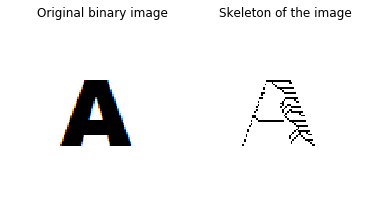

In [32]:
image = io.imread('./images/exerc3a.bmp')
thresholded_image = apply_global_median_threshold(image)
processed_image = zhang_suen(thresholded_image)
show_before_after_img(image, processed_image)

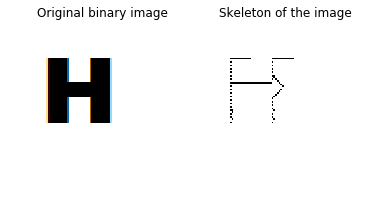

In [33]:
image = io.imread('./images/exerc3b.bmp')
thresholded_image = apply_global_median_threshold(image)
processed_image = zhang_suen(thresholded_image)
show_before_after_img(image, processed_image)

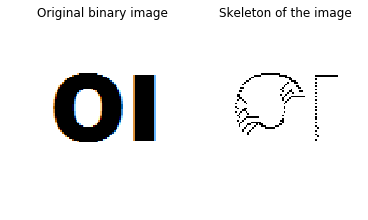

In [34]:
image = io.imread('./images/exerc3c.bmp')
thresholded_image = apply_global_median_threshold(image)
processed_image = zhang_suen(thresholded_image)
show_before_after_img(image, processed_image)

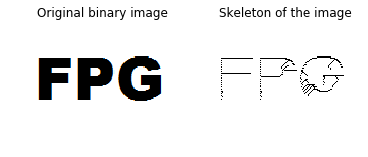

In [35]:
image = io.imread('./images/exerc3d.bmp')
thresholded_image = apply_global_median_threshold(image)
processed_image = zhang_suen(thresholded_image)
show_before_after_img(image, processed_image)

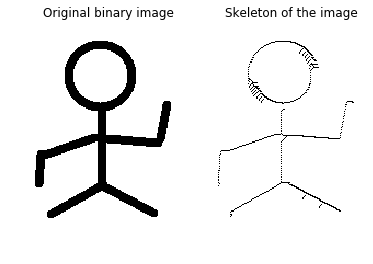

In [36]:
image = io.imread('./images/exerc3e.bmp')
thresholded_image = apply_global_median_threshold(image)
processed_image = zhang_suen(thresholded_image)
show_before_after_img(image, processed_image)